In [5]:
from math import cos, atan
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# D é o desvio padrão do erro da medida, só botei qualquer coisa pra testar
D = 2

# Erro da medida
e = np.array([np.random.normal(0,D,1), np.random.normal(0,D,1), np.random.normal(0,D,1)])
print(e)

# Esse é o X que devemos obter no final da otimização
x_real = np.array([[0.2], [0.5], [0.3]])
print(x_real)

#Assinatura
A = np.array([[2, 127, 225], [41, 140, 114], [60, 42, 207]])

# Esse valor de R é o valor "perfeito"
R_real = A.dot(x_real)
print(R_real)

# R_medido, colocamos ruído para atrapalhar a coisa toda
R_medido = R_real + e


print(R_medido)
e_ = []


[[-0.52996601]
 [ 2.1965699 ]
 [ 2.63830491]]
[[0.2]
 [0.5]
 [0.3]]
[[131.4]
 [112.4]
 [ 95.1]]
[[130.87003399]
 [114.5965699 ]
 [ 97.73830491]]


[0.2569487  0.50248169 0.29573566]
1.0551660449844038


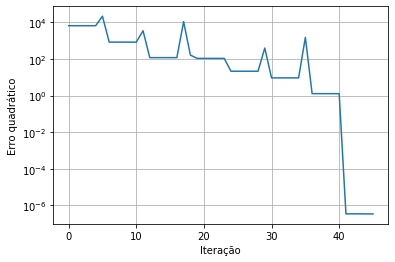

In [6]:
# Devemos minimizar o erro quadrático de cada componente, então:
def f(x):
    e_.append(np.sum((R_medido - np.array([A.dot(np.array(x))]).T)**2))
    return np.sum((R_medido - np.array([A.dot(np.array(x))]).T)**2)

bnds = ((0, 1), (0, 1), (0, 1))
cons = ({'type': 'ineq', 'fun': lambda x:  x[0]+ x[1] +x[2] - 1})

x0 = [0.5, 0.5, 0.5]
res = minimize(f, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(res.x)
print(np.sum(res.x))

plt.semilogy(e_)
plt.xlabel('Iteração')
plt.ylabel('Erro quadrático')
plt.grid(True)

plt.show()